In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Covid19-dataset/train'
validation_path = '/content/drive/MyDrive/Covid19-dataset/val'
test_path='/content/drive/MyDrive/Covid19-dataset/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Covid19-dataset_trail/train/*')
print(len(folders))

3


In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
import tensorflow as tf
model.compile(
  loss='categorical_crossentropy',
  optimizer = 'adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

training_generator = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    zoom_range = 0.2,
    shear_range = 0.2,

)
valid_generator=ImageDataGenerator(
    rescale = 1. / 255,
)



In [ ]:
training_set = training_generator.flow_from_directory('/content/drive/MyDrive/Covid19-dataset_trail/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                          class_mode = 'categorical',
                                          )

Found 226 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
vaild_set = valid_generator.flow_from_directory('/content/drive/MyDrive/Covid19-dataset_trail/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            )

Found 25 images belonging to 3 classes.


In [ ]:
print(len(training_set))

8


In [ ]:
print(len(test_set))

3


In [ ]:

r = model.fit(
  training_set,
  validation_data=vaild_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(vaild_set)
)

Epoch 1/20
8/8 [==============================] - 22s 2s/step - loss: 1.2307 - accuracy: 0.5442 - val_loss: 0.6183 - val_accuracy: 0.7600
Epoch 2/20
8/8 [==============================] - 14s 2s/step - loss: 0.3925 - accuracy: 0.8363 - val_loss: 0.4229 - val_accuracy: 0.8000
Epoch 3/20
8/8 [==============================] - 14s 2s/step - loss: 0.2819 - accuracy: 0.9071 - val_loss: 0.5388 - val_accuracy: 0.8000
Epoch 4/20
8/8 [==============================] - 14s 2s/step - loss: 0.2152 - accuracy: 0.9292 - val_loss: 0.3800 - val_accuracy: 0.8400
Epoch 5/20
8/8 [==============================] - 14s 2s/step - loss: 0.1382 - accuracy: 0.9513 - val_loss: 0.3182 - val_accuracy: 0.8800
Epoch 6/20
8/8 [==============================] - 14s 2s/step - loss: 0.1489 - accuracy: 0.9469 - val_loss: 0.3370 - val_accuracy: 0.9200
Epoch 7/20
8/8 [==============================] - 14s 2s/step - loss: 0.0972 - accuracy: 0.9779 - val_loss: 0.2778 - val_accuracy: 0.8800
Epoch 8/20
8/8 [==================

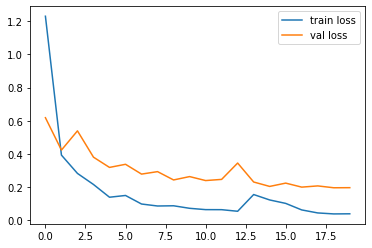

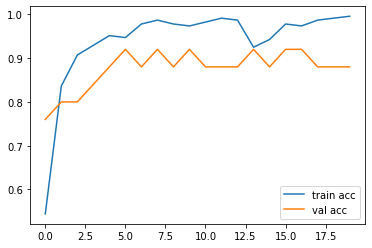

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from keras.models import load_model
img=image.load_img('/content/drive/MyDrive/Covid19-dataset_trail/test/Covid/0100.jpeg',target_size=(224,224))
x=image.img_to_array(img)
print(x)
x=np.expand_dims(x,axis=0)
print(x)
img_data=preprocess_input(x)
print(img_data)
classes=model.predict(img_data)
print(classes)

[[1.0000000e+00 4.4866992e-12 4.0180573e-34]]


In [ ]:
y_actual=[]
y_test=[]

In [ ]:
from math import floor

In [ ]:
import os
for i in os.listdir("/content/drive/MyDrive/Covid19-dataset_trail/test/Normal/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset_trail/test/Normal/'+i,target_size=(224,224))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    Hero=model.predict(img_data)
    predicted=np.argmax(Hero, axis=1)
    if(predicted[0]==1):
        y_test.append(1)
    else:
        y_test.append(0)
    
    y_actual.append(1)
    
    
    
    

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Covid19-dataset_trail/test/Covid/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset_trail/test/Covid/'+i,target_size=(224,224))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    Hero=model.predict(img_data)
    predicted=np.argmax(Hero, axis=1)
    if(predicted[0]==0):
        y_test.append(0)
    else:
        y_test.append(1)
        
    y_actual.append(0)
    
    

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Covid19-dataset_trail/test/Viral Pneumonia/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset_trail/test/Viral Pneumonia/'+i,target_size=(224,224))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    Hero=model.predict(img_data)
    predicted=np.argmax(Hero, axis=1)
    if(predicted[0]==2):
        y_test.append(2)
    else:
        y_test.append(0)
        
    y_actual.append(2)

In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
print(y_actual)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0 0 2 0]


[[ 9 17  0]
 [ 0 20  0]
 [13  0  7]]


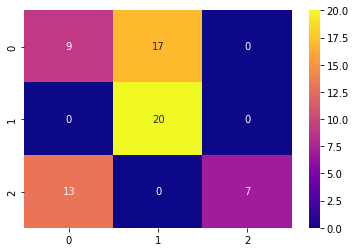

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)
import seaborn as sns
sns.heatmap(cm,cmap="plasma",annot=True)
print(cm)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_actual,y_test,digits=3))

              precision    recall  f1-score   support

           0      0.409     0.346     0.375        26
           1      0.541     1.000     0.702        20
           2      1.000     0.350     0.519        20

    accuracy                          0.545        66
   macro avg      0.650     0.565     0.532        66
weighted avg      0.628     0.545     0.518        66



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_actual, y_test)

0.5454545454545454